# **Neural networks for Regression**

What is regression problem: The problem in which we try to predict the output value based on the input values: Learining the relationship between features and the study variable...

Examples: Predicting: House price based on the features of the house... How many people will buy the app How much the personal health insurance be How much/many....

Other cases.... trying to predict where the co-ordinates of a box should be, in an object detection problem...

For example:

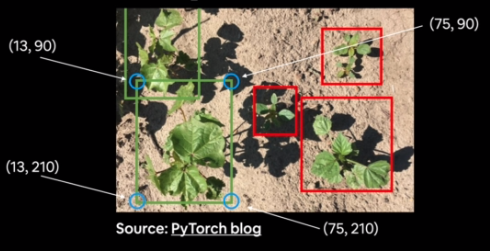

In this image the regression is used to predict the cordinates of the bounding boxes. For example cordinates:  (13,90)means that the vertex is 13 pixels from the left verticle axis and 90 pixels from the upper horizontal axi, etc.,..

**What we cover in this session:**
- Architecture of a neural network regression model
- Input shapes and the output shapes of a regression model( Features and Labels of the dataset)
- Creating custom data to view and fit
- Steps in modelling
 - Creating model, compiling model. fitting model, evaluating model
- Different evaluation methods
Saving and loading our models

# **Regression Inputs and outputs**
Suppose we want to predict the sell price of a hoouse as shown below:

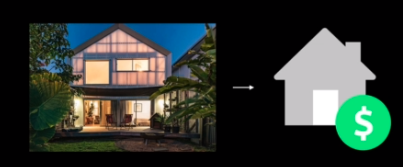

So we need to build a machine learning model predict the amount this house should sell at. Below is a high level diagram of the model we need to build.


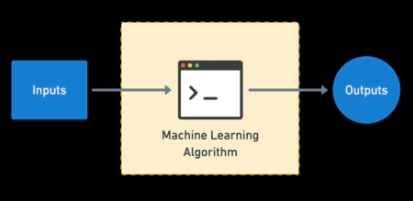

As we can see our machine learning model takes in inputs and outputs a prediction based on the inputs it was give. Now, in the case of our house, what might be the features that we fit into our model.

Suppose we know features about the house, for example:
- The number of bedrooms
- The number of bathrooms
- The number of garage
- The distance of the house from the shopping centre, etc

Now, in our machine learning model, first we will have to encode this information into numerical data and use the resultant data to the model...

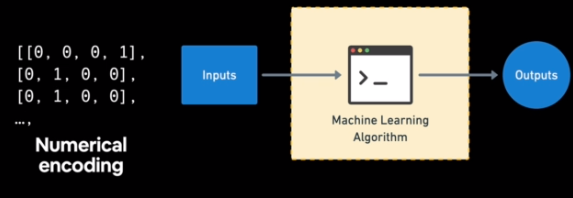

For example first row says, there is 0=No 1bed, 0=No 2beds, 0=No 3beds, and 1=yes 4 beds, the second row says there is 2 bathrooms, and row three says there are 2 garage. 

Once our data is encoded this becomes the inputs(information about the problem am solving) to our machine learning model. Now, of the model does exist we can build our own.



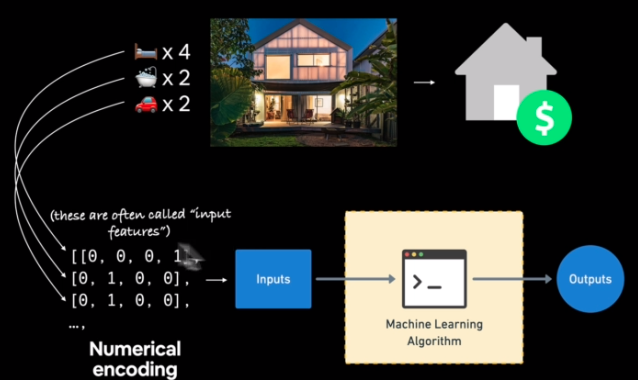

Now after fitting the data to the machine learning model (which was previously trained on the many examples of the similar features to the one of the houses we are trying to predict), the model output the value which is the price we should sell our house for.

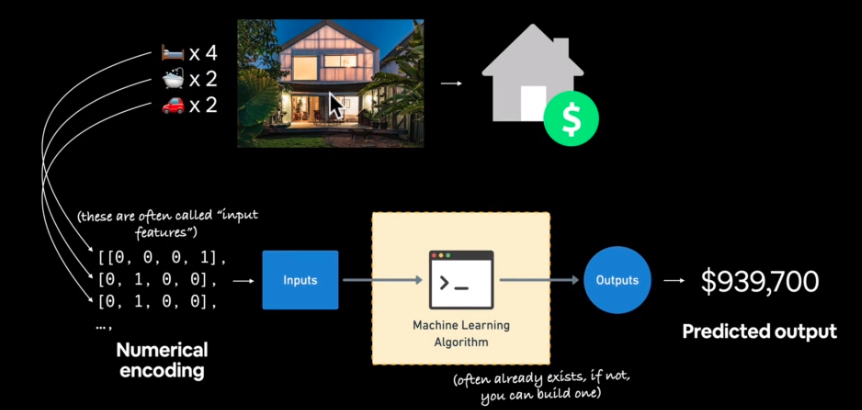

If we look at the actaul price of our house we can notice is $940,000 which is not fur from what our model predicted. How did the model know this?

Previously, data with both feature and labels was used to trained the machine learning algorithm so that it learnt the relationship between features and the labels. Based on this knowledge, our model is now able to predict the value of any house given the features of such house and given that these features are similar to the the one used in the training proces.

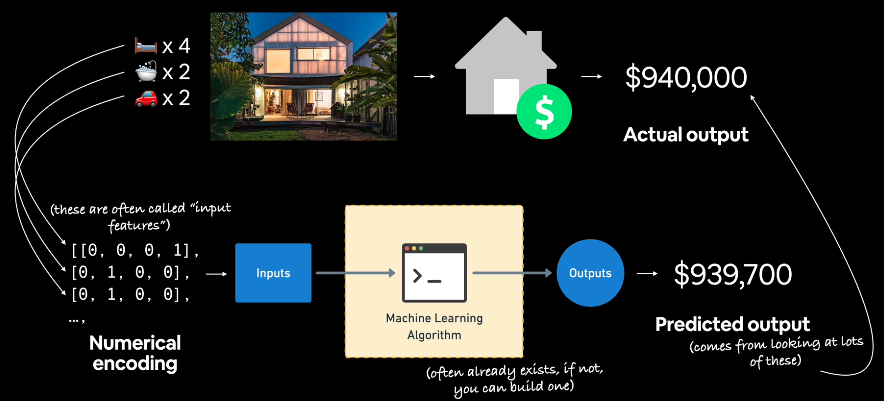

Another key point and which we will need to be very keen with when building an machine learning model is defining the shape of our input and the the output.

Input shape is simply the number of features in each training example.

Note our numerical encoding is tensor represenation of our input features themselves are not the input shape.

---> Input shape is 3.




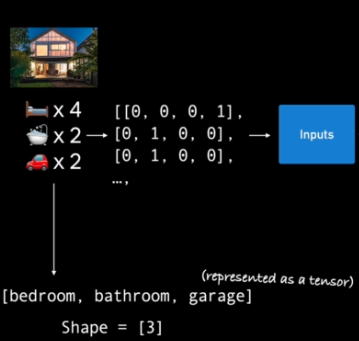

---> Output shape is is 1.

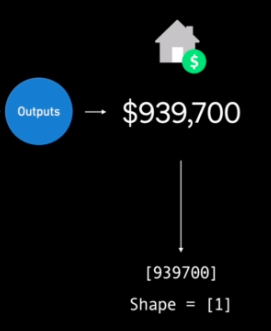

From this we can see that, for each example we pass in our machine learning algorithm, it will have 3 features and fro this three features the model returns a constant values. Thus the input shape is 3 an the output shape is 1.

For regression problem, the input can be of any shape but the output will always be of shape 1 since we are trying to predict some sort of number.

# **Anatomy of a Neural Network**

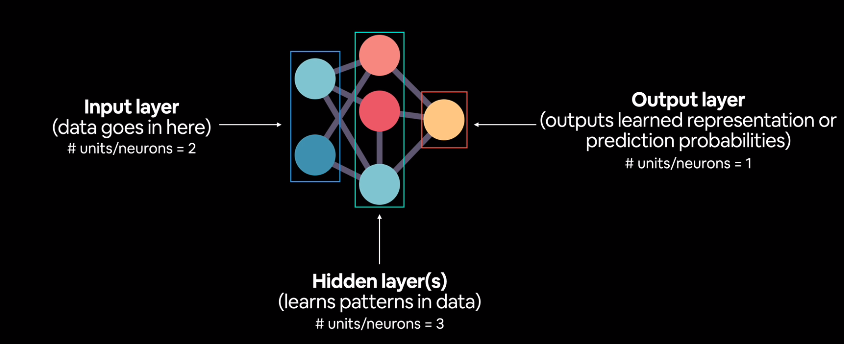

Patterns learned are also known as: Weights, embedding, feature representation, feature vesctors...

In [ ]:
Architecture of a regression model

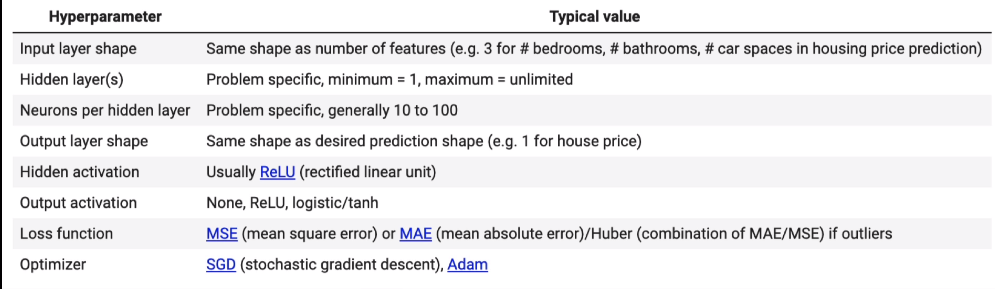

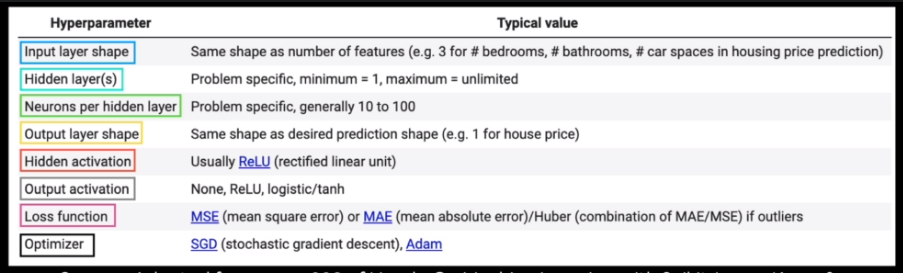

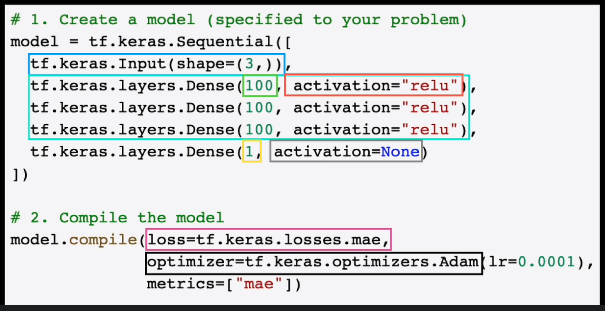

Loss function: measure how wrong our neural network predictions are.
Optimizer: Trains the neural network. Simply it upgrades the learn weights...

## **Creating a simple Neural network in tensorflow**

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


### creating some data to view and fit

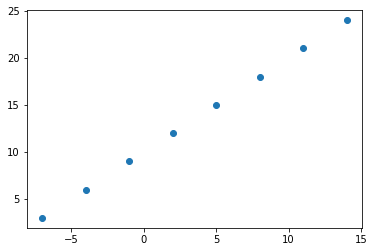

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it 
plt.scatter(X,y)

In [ ]:
# realationship between y and X
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# carete demo tensor for our housing prediction
house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = X.shape
input_shape, output_shape
# above shape is not true

((8,), (8,))

Just like in our house_price problem we want to use one house to predict the values of that house. Simply we use features of one house to predict the price of that one house. Since our problem is a one to one mach of the of features and labels, we will use one value of X to predict one value of y. That's...

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

So, since the input is only one value, what if then we check the shape...

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

From this output it shows our input and output have no shape.

In [ ]:
# Turn our Numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

Now lets build a model to learn the realtionship between the X and y values.

## Steps in modelling with tensorflow.
1. **Creating a model** - define the input and output layers, as well as the hidden layers of the deep learning model.
2. **Compile a model**- here define:
 - *Loss function*: a function that tells our ,model how wromg it is.
 - *Optimizer*:  a function that updates the last-epoch learned weights.
 - *Evaluation matrics*: methods that we use to interpret the performance of our model.
3. **Fitting the model** - letting the model learn from the data( fitting the patterns between features and labels).
4. ***Evaluate*** the model on the test data
5. Improve through ***experimentation***
6. ***Save*** and **reload** your trained model

In [ ]:
# set random seed
tf.random.set_seed(42)
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 559ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [ ]:
# >>>>>>|<<<<<< convert data to float32 
# (Numpy --> tensor float32 works)
X = tf.constant(X, dtype = tf.float32)
y = tf.constant(y, dtype = tf.float32)

TypeError: ignored

In [ ]:
# (tf.float64 --> tf.float32 does not work)
#X = tf.constant(X, dtype = tf.float32)
#y = tf.constant(y, dtype = tf.float32)

## Make prdictions using our machine learning model

In [ ]:
# lets look at our data
print(X, "\n", y)

In [ ]:
# prediction
y_pred = model.predict([17.0])
y_pred

Just we can see from the evalaution matric, our model predict a value 11 points off where it should be...

In [ ]:
# still off
y_pred + 11

Our model is still off...

## Improving our model(Note we start small)
We can improve our model by altering the steps we took to create the model.
1. **Creating the model** - here we might add more layers, increase number of hidden units (also called neurons) within each of the hidden layers,  we may change the activation function of each layer.
2. **Compiling the model -** Here we might change the loss function, change the optimization function or perhaps the **leraning rate** of the optimization function.

3. **Fit -** here we might fit a model for more **epochs**(give the model longer time to learns more from the data), or more data(give the model more example to learn from).

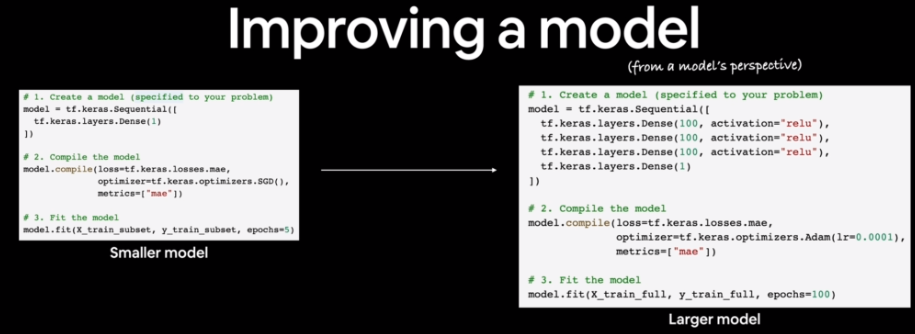

Now, let's improve our model by changing one thing at a time.

In [ ]:
# let's rebuild our model
# set random seed
tf.random.set_seed(42)
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model(this time we will train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100, verbose = 0)

In [ ]:
# Let's re-print our data again
print(X, "\n", y)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64) 
 tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)


In [ ]:
# Let's see if our model prediction has improved
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [ ]:
# add one more layer
# set random seed
tf.random.set_seed(42)
# create model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# compile the model
model1.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model(this time we will train for longer)
model1.fit(tf.expand_dims(X, axis = -1), y, epochs = 100, verbose = 0)

In [ ]:
model1.predict([17.0])

array([[29.006927]], dtype=float32)

In [ ]:
# introduce activation function
# set random seed
tf.random.set_seed(42)
# create model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model2.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model(this time we will train for longer)
model2.fit(tf.expand_dims(X, axis = -1), y, epochs = 100, verbose = 0)

In [ ]:
# make predictions
model2.predict([17.0])

array([[31.38265]], dtype=float32)

In [ ]:
# change the optimization function

# set random seed
tf.random.set_seed(42)
# create model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model3.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

# fit the model(this time we will train for longer)
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# make prediction
model3.predict([17.0])

array([[26.206877]], dtype=float32)

In [ ]:
# increase the number of hidden layers
# change the optimization function

# set random seed
tf.random.set_seed(42)
# create model
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"), # increase
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"), # decrease
    tf.keras.layers.Dense(1)
])

# compile the model
model4.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

# fit the model(this time we will train for longer)
model4.fit(tf.expand_dims(X, axis = -1), y, epochs = 100, verbose = 0) # decrese increase

- Learn the hyperparameter tunning for self-learning of the model based on the required model accuracy.... (Take actions that will enable the model hit the target, make progression after you've chosed the optimal combination of the current stage...(This to enhance an efficient way of learning...)

Model should be used to predict the numbers in the rage it was used to trained it. Determine the worst of the range our values might fall into...

In [ ]:
# mind our self of the data
print(X,"\n",y)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64) 
 tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)


# **Make prediction(User Level)**

In [ ]:
Model4_pred = int(np.round(model4.predict([20.0]), 0))
print("Model Prediction: ", Model4_pred)

Model Prediction:  30


Functionalize the output:

In [ ]:
def input_number(data = 0):
    Model4_pred = int(np.round(model4.predict([data]), 0))
    return print("Model Prediction: ", Model4_pred)

#Incase of picture annotaion include some randomness chosed from the best
# posibilities
# re-build from the current return images incase the user reloads again with increase 
# Qualities and different styles... randon... incoparate user in this randomness


You entered: __

Model Prediction: __

In [ ]:
# Find out how to read data from the user:
data = int(input("Enter Data:"))
input_number(data)

Enter Data:30
Model Prediction:  40


# Common ways to improve model
- Training for long(Increase the number of epochs)
- Adding layers
- increase the number of hidden units
- Change the activation function
- Change the learning rate
- Fitting on more data

These knobs we tunning to improve the performance of the model are called **hyperparameters**.

**Parameters** are the pattern the model learn: We dont code them by ourselves

# **Model Evaluation**

In practice a typical workerflow you'll go through when building a neaural network is:

```
Build a model--> fit it --> evaluate it --> tweak a model-->
fit it --> evaluate it--> tweak a model --> fit it --> evaluate it -->
```

When building the model we:
"Experiment, Experiment, Experiment..."

Now, when it comes to evaluation... There are three words we should memorize:

> "Visualize, visualize, visualize..."

It's a good idea to visulize:
* The data - what data we are working with? What does it look like?
* The model itself - What does our model look like?
* The training of the model - how does the model perform while it learns?
* The prediction of the model - how do the prediction line up against the ground truth(Originanl labels)?

In [ ]:
import tensorflow as tf

In [ ]:
# Make bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

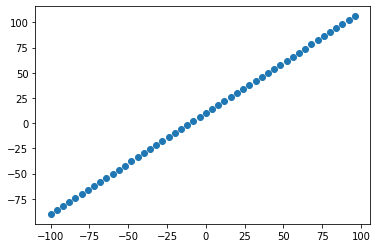

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...
- **Training set:** Model learns from this data: Ratio of the total data:- 70 -80% of the data availabe. Also (90 - 99% for larger datasets).

- **Validation set:** the model gets tuned on this data, which is typically 10 - 15% of the data available.

- **Test set:** The model gets evaluated on this data to test what it has learned. This set is typically 10 - 15% of the total data available.

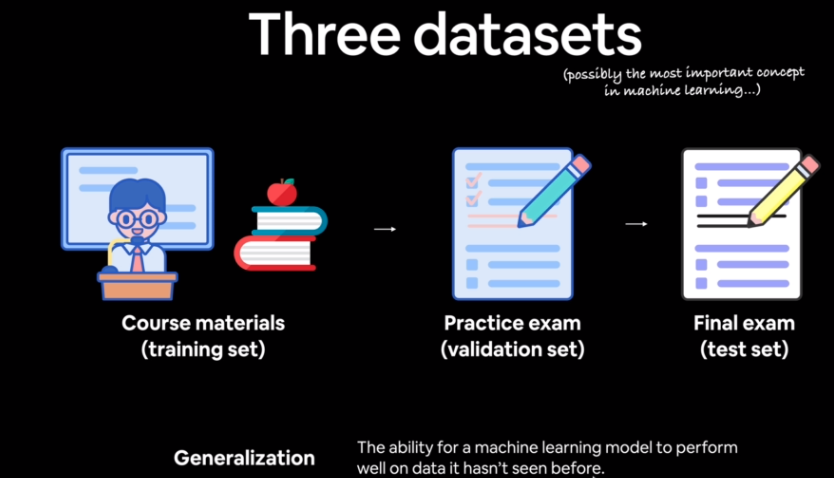

In [ ]:
# chech the length of the samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
x_train = X[:40] # first 40 are traiong samples (80% of the data)
y_train = y[:40]

x_test = X[40:] # last 10 are testinf samples (20% of the data)
y_test = y[40:]

(len(x_train), len(x_test)), (len(y_train), len(y_test))

((40, 10), (40, 10))

# Visualizing the data
Now we've got our data in training and tests... let's visualize it again!

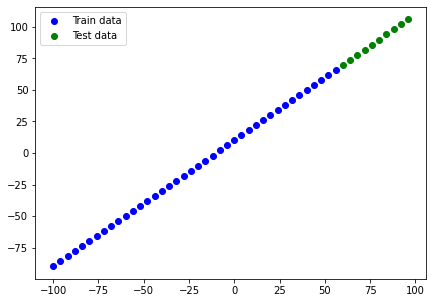

In [ ]:
plt.figure(figsize = (7,5))
# Plot the training data in blue
plt.scatter(x_train, y_train, color ="b", label = "Train data")
# Plot the test data in green
plt.scatter(x_test,y_test, color = "green", label = "Test data")
# Show a legend
plt.legend(); # add legend ny default...

In [ ]:
# Let's have a look at how to build a neaural network for our data
tf.random.set_seed(42)
# 1. Create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile our model
model.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. fit the model
#model.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100)

# Visualizing the model
We can get an idea of how our model looks like even before running it by call the `summary()` method on the model.

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
model.build()

ValueError: ignored

### specify input_shape on the first layer for automatic build 

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "Input_Layer"),
    tf.keras.layers.Dense(1, name = "Output_Layer")
], name = "Model_1")

# 2. Compile the model
model.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - This are parameters (patterns) the model can update as it trains.
* Non - trainable params: This pramters are not updates during training (this is typical when you bring in already learn patterns or parameters from other model during **transfer learning**).

📖 **Resource:** For more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning videos](http://introtodeeplearning.com/).

🛠 **Exercise:** Try playing around wiht the number of hidden units in a hiodden layer, see how that affects the number of parameters(total and trainable) by calling `model.summary()`.

In [ ]:
# fit the model
model.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [ ]:

# Get the summary of our model
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


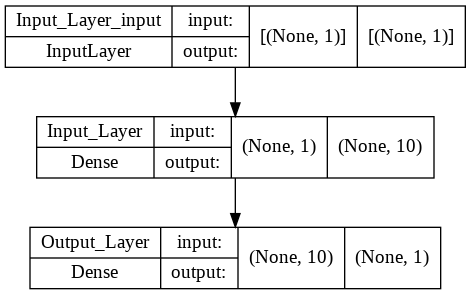

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes =True)

# **Visualizing model predictions**
To visualize predictions, it's good idea to plot them against the ground truth labels. Often in practice you will see this in form of `y_test` or `y_true` verse `y`_pred` (ground truth versus your model predictions)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
# ground truth
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Instead of going through the model predictions and compairing them to the ground truth, let's see how we canvisualize them.

To do this, let's create a plotting function

🔑 **Note:** If you feel like you're going to reuse some tind of functionality in the future it is a good idea to turn it into a function.

In [ ]:
# create a plotting function
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_pred):
    """Plots training data, test data and model predictions"""
    plt.figure(figsize = (7,5))
    # plot training data
    plt.scatter(train_data, train_labels, color = "b", label = "Trainning data")
    # plot test data
    plt.scatter(test_data, test_labels, color = "g", label = "Test Data")
    # plot model predictions
    plt.scatter(test_data, predictions, color = "r", label = "Predictions")
    # show legend
    plt.legend()

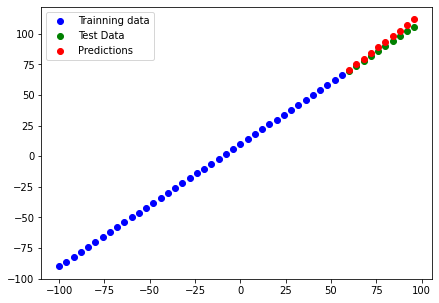

In [ ]:
plot_predictions()

### Evaluating our model's predictions with evaluation metrics
Depending on the problem you're working on, there will be different evalaution metrics to evaluate your model's performance.

Since we are working on the regression problem, two of the metrics are:
* MAE - Mean absolute error, "on average, how wrong is each of the my model's prediction"
* MSE - mean square error, square and average error...

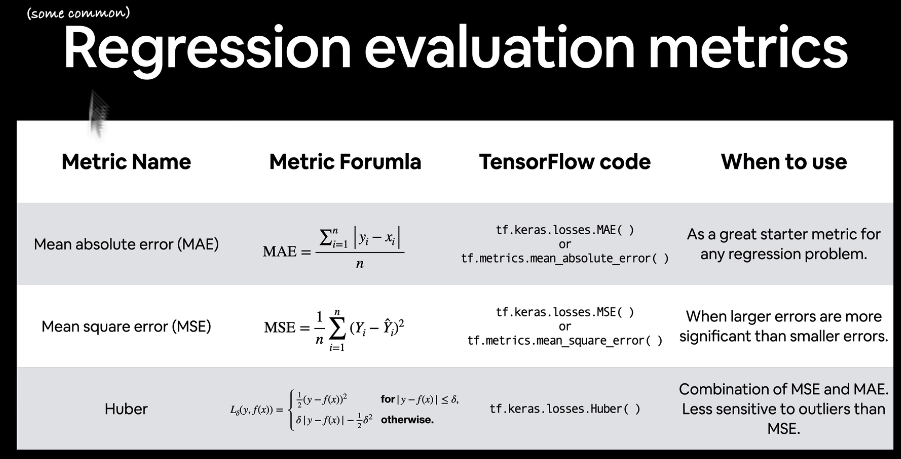

In [ ]:
# Evaluate the model on the test set
model_4.evaluate(x_test,y_test)

1/1 [==============================] - 0s 162ms/step - loss: 0.1312 - mae: 0.1312


[0.13119812309741974, 0.13119812309741974]

If we ever want to compaire different tensors, we need to ensure there shape are similar... actually the one with high dimension should be brought down to have the same dimension as the one with small dimension.....

make sure the shapes are of y_true and the y_pred are similar...

In [ ]:
 # calculate the mean ablsolute error
 mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                      y_pred = y_pred)
 mae 

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

Failed

In [ ]:
# check the differences between the y_test and y_pred
y_pred.shape, y_test.shape

((10, 1), TensorShape([10]))

shape differs <<< squeeze y_pred4...

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

Now calculate msterics

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the mean sqaure error
mse = tf.keras.losses.MSE(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
mse_2 = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

Let's create some helper functions>>>>

In [ ]:
# Make some function to re-use MAE nad MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true = y_true,
                                          y_pred = tf.squeeze(y_pred))
    
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true = y_true,
                                         y_pred = tf.squeeze(y_pred))

### Experiments to improve our model...
Machine learning Practitioner's motto:
```
Build a model--> fit it --> evaluate it --> tweak a model-->
fit it --> evaluate it--> tweak a model --> fit it --> evaluate it -->
```

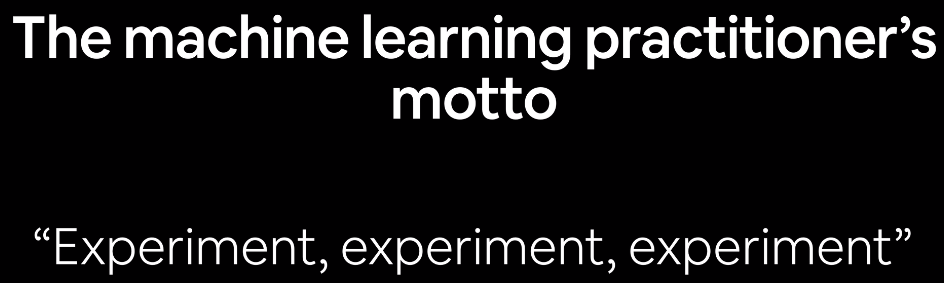

1. Get more data - get more example for your model to train on ( sufficient information to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of the chances to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layers, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build Model_1**

In [ ]:
# Let's have a look at how to build a neaural network for our data
tf.random.set_seed(42)
# 1. Create a model
model_1 =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile our model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
model_1.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100, verbose = 0)

What do scientist do when they run experiments? They track their results...

What about if make some prediction with our model and then we visualize them...

Great idea!

In [ ]:
# make and plot prediction for model one

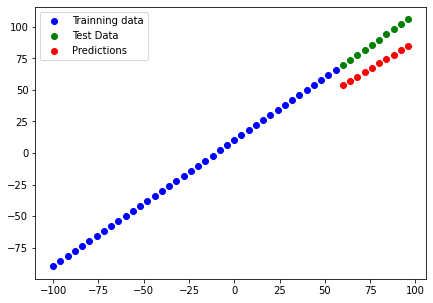

In [ ]:
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
# Calculate  model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build model_2**
* 2 dense layers, trained for 100 epochs

In [ ]:
# set random seed
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = [1]),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fit the model
model_2.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100, verbose = 0)

**Note:** input is neccessary when we want to view the structure of our model.
We can proceed without if we are fitting the data.

In [ ]:
# make predictions
y_pred_2 = model_2.predict(x_test)

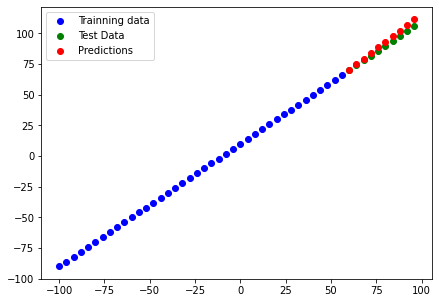

In [ ]:
# plot predictions against the ground lables
plot_predictions(predictions = y_pred_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9403756>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.373231>)

**Build Model_3.**
* 2 layers trained for 500 epochs

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fit the model
model_3.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 500, verbose =0)

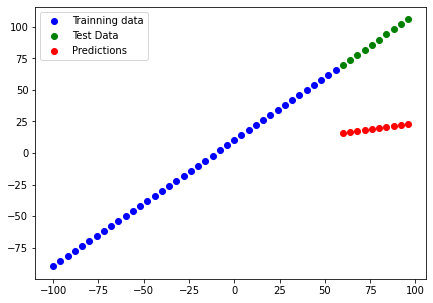

In [ ]:
# Make and plot predictions
y_pred_3 = model_3.predict(x_test)
plot_predictions(predictions =y_pred_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

In [ ]:
    tf.keras.layers.Dense(10,input_shape = [1]),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(60, activation = "relu"),
    tf.keras.layers.Dense(1)



In [ ]:
# Improve our model
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(20,input_shape = [1]),
    tf.keras.layers.Dense(80, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

# 3. Fit the model
model_4.fit(x_train, y_train, epochs = 100, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
import numpy as np

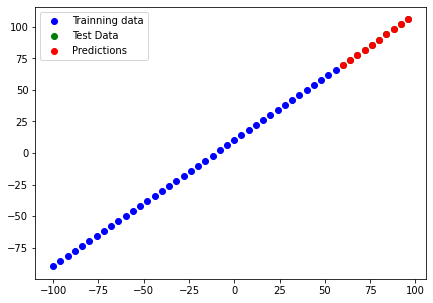

In [ ]:
# plot predictions
y_pred_4 = tf.constant(np.round(model_4.predict(x_test), 0), dtype = tf.float32)
plot_predictions( predictions = y_pred_4)

In [ ]:
# Calculate model_4 evaluation metrics
mae_4 = mae(y_test, y_pred_4)
mse_4 = mse(y_test, y_pred_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when neccesary.

# Comparing the results of our expiriments
We've run a few experiments, let's compaire results:

Asw we said, machine learning practitioner's motto:

```Experiment, experiment, experiment```: 

But they do not experiment relentesly, they do a few and compaire them, see which one works and then they disregard the one that doesn't work and move forward with the one that do. So lets see how we can compaire results of our expeimnets.

In [ ]:
# Let's compaire our models result's using pandas DataFrame
import pandas as pd
model_results = {"model": ["model_1", "model_2", "model_3", "model_4"],
                 "mae": [mae_1.numpy(),mae_2.numpy(), mae_3.numpy(), mae_4.numpy()],
                 "mse":[mse_1.numpy(), mse_2.numpy(), mse_3.numpy(), mse_4.numpy()]}

# create a dataframe
all_results = pd.DataFrame(model_results)
all_results.sort_values("mae", inplace =True)
all_results

,model,mae,mse
3,model_4,0.000000,0.000000
1,model_2,2.940376,11.373231
0,model_1,18.745327,353.573364
2,model_3,68.713615,4808.027344


Looks like model 3 performed the best

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                40        
                                                                 
 dense_11 (Dense)            (None, 80)                1680      
                                                                 
 dense_12 (Dense)            (None, 1)                 81        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goal should be to minimize the time between your experiments. The more experimanents you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment"

## Tracking your experiments
One of the good habits in machine learning modelling is to truck the resultd of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As we build more models, you'll want to look into using:
* **TensorBoard** - a component of the Tensorflow library to help track the expiraments (we'll see this one later).
* Weights and Biases - a tool for trucking all kinds of machine learning experiments (plugs straight into tensorBoard)

## **Saving our model**
Saving a model allows us to use them outside the Goole colab (or wherever they were trained) such as in web application or a mobile app. There two main formats we can save our model to:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# saved model using the SavedModel format
model_4.save("Deplo_Model")

In [ ]:
# save a model using the HDF5 format
model_4.save("Best_model_HDF5_format.h5")

# **Loading in a saved TensorFlow Model**

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("Deplo_Model")
loaded_SavedModel_format

In [ ]:
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                40        
                                                                 
 dense_11 (Dense)            (None, 80)                1680      
                                                                 
 dense_12 (Dense)            (None, 1)                 81        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                40        
                                                                 
 dense_11 (Dense)            (None, 80)                1680      
                                                                 
 dense_12 (Dense)            (None, 1)                 81        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Copare model_4 predictions with SaveModel format model prediction
model_4_preds = model_4.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)

# Equate the models predictions:
model_4_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# We can comapures the mae of the model_4 and the loaded_SavedModel_Format
mae(y_test,model_4_preds) == mae(y_test, loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/Best_model_HDF5_format.h5")

In [ ]:
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                40        
                                                                 
 dense_11 (Dense)            (None, 80)                1680      
                                                                 
 dense_12 (Dense)            (None, 1)                 81        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                40        
                                                                 
 dense_11 (Dense)            (None, 80)                1680      
                                                                 
 dense_12 (Dense)            (None, 1)                 81        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4_preds = model_4.predict(x_test)
loaded_h5_model_preds = loaded_h5_model.predict(x_test)
model_4_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# functionalize model comparison
def model_equality(base_model, loaded_model):
    base_model_preds = base_model.predict(x_test)
    loaded_model_preds = loaded_model.predict(x_test)
    Output = (base_model_preds == loaded_model_preds)
    return Output

In [ ]:
model_equality(model_4,loaded_SavedModel_format)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model from a Google Colab
If you want to download your file from Google Colab:
1. You can go to the "files" tab and click on the file you're after and click "download".
2. Use code (see the cell below)
3. Save it to the Google Colab by connecting Google Drive and copying it there(see 2nd code cell below)

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/Best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting of a Google Drive)
!cp/content/Best_model_HDF5_format.h5 /content/drive/MyDrive/Tensorflow

/bin/bash: cp/content/Best_model_HDF5_format.h5: No such file or directory


In [ ]:
!ls /content/drive/MyDrive/Tensorflow

 besed_model_HDF5_format.h5  'Neural_Network forRegression.ipynb'


# A large example
We've been looking at a simiple dataset. But in practice we will be solving problem with whose dataset are huge.
In this session we will build a deep learning model that laverages huge dataset to solve a real-world problem.

In [ ]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# print the head of the dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# check the shape of the dataset
insurance.shape

(1338, 7)

Dataset has 1338 examples and 7 columns ( 6 features and 1 study variable).

# Content of the dataset
**Columns**

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking (smoker or non-smoker)

region: the beneficiary's residential area (US, northeast, southeast, southwest, northwest).

charges: Individual medical costs charged vy the insurance based on the above features.

# Objective:
The objectve of this project is to develop a Regression Neural Network that will learn the relationship between features of the dataset and the study variable. This model will then be used to predict the insurance charges of the future clients based on their features (risk they are exposed to).

**Dataset Features:** age, sex, bmi, children, smoker, and region

**Dataset Study Variable:** charges

Now, we can't just take our data and pass it direct to our neural network model. If we inspect our data ypu can note that some features sex as sex and `region` are `string`. As we know, machine learning models works with numerical data. With this said, our first step will be cleaning our dataset.

In [ ]:
# check the data info
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see 3 out of 6 features are object data types (sex,  smoker, charges). They cointain categorical data.

We need to numerically encode these features. In this case we will use one-hot encoding

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)

In [ ]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create features and labels
X = insurance_one_hot.drop("charges", axis = 1) # include axis to the drop method
y = insurance_one_hot["charges"]


In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
# Autmatically shuffle data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42) #
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# shape of an input (shape of a single example)
a = X.iloc[0]
a.shape

(11,)

In [ ]:
# Build a neural network model

# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it.

To (try) improve our model we'll run 2 experiments.
1. Add an extra layer with more hidden units and use an Adam optimizer.
2. Same as aboove but train for longer (200 epochs).
3. Engineer your own experiment too and see if your model can bit the one we train together.

# **Experimient-s**

In [ ]:
# Build a neural network (sort of like model_3 above)
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

If you ever get nan and nan, it means there is something wrong with the model...(model is too complex to learn). ---> it means the model is too big for the data to teach it anything.... try to change the optimization function and alter larning rate....

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5405.9507 - mae: 5405.9507


[5405.95068359375, 5405.95068359375]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
# Build a neural network (sort of like model_3 above)
tf.random.set_seed(42)

# 1. Create the model(same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 200, verbose = 0)

In [ ]:
# Evaluate the larger model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3531.7402 - mae: 3531.7402


[3531.740234375, 3531.740234375]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
# plot history (also known as a loss curve or a training curve)

Text(0.5, 0, 'epochs')

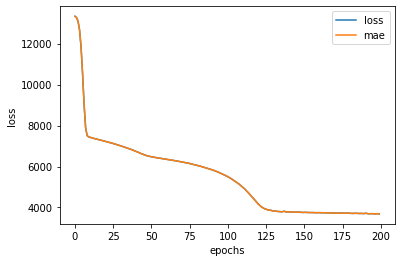

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question:** How long should you train for?

I depends . Really... it depends on the problem your're working on. However many people have asked this question before... so Tensorflow has a solution! It's is called early [stopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a Tensorflow component you can add to your model to stop training once it stops improving a certain metric.

  # Preprocessing the data (normalization and Standardization)
  In terms of scalling values, neural networks tend to prefer normalization. If you're not sure which to use, you could try both and see which performs better.

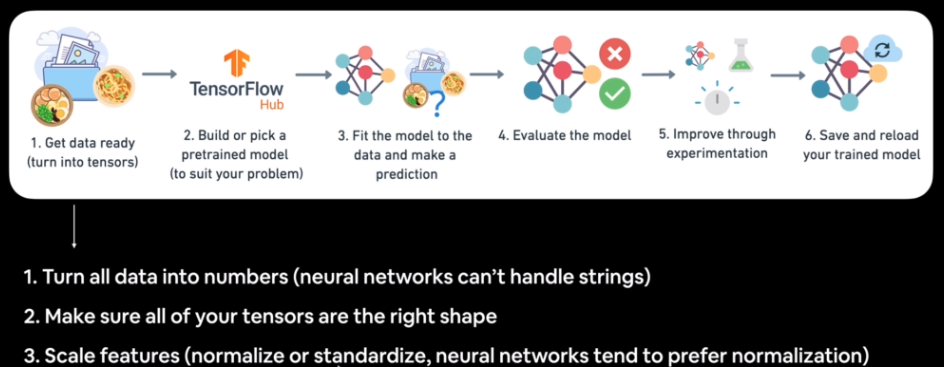

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance DataFrame
insurance =  pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data we can borrow a few classes from Scikit-Learn

🔑 **Note:** We transform the data after splitting train-test set. We can't do this before we split since we treat the test data as the data from the future and if we do it will be like we are passing the information from the future to the current moment. This will result into baised model in real world applications.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turns all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# Create our X and y values
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build out train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 42)

# Fit the column transformer to our trainining data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScaler and OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [ ]:
x_train.iloc[0]

age                46
sex            female
bmi             19.95
children            2
smoker             no
region      northwest
Name: 560, dtype: object

In [ ]:
# what does our data look like now?
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

Our datav has been normalized and one-hot encoded.
Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build neural network model to fit on a normalized data
# set random seed
tf.random.set_seed(42)

# Build the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

# Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

# Fit the model on the training dataset
insurance_model_4.fit(x_train_normal, y_train, epochs = 100, verbose = 0)

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3448.3350 - mae: 3448.3350


[3448.3349609375, 3448.3349609375]

In [ ]:
# Insurance model 3 results
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3531.7402 - mae: 3531.7402


[3531.740234375, 3531.740234375]

The performance of our model increase by preprocessing the data we are using...

When building the model, make sure your increase it's scale after you've tried all the possible tweaks at each stage and still not hit into the accecptable accuracy...

The first result you get when you build a deep learning model is not your last results... there many things you can tweak, the dataset, and all hyperparamters.... Always remember this (We don not need to over-shoot one hyper-parameter inorder to make the model work when we can still attained the same goal by tweaking them in early stage)...